<a href="https://colab.research.google.com/github/sandrocaetano/dio-redesneurais-transferlearning/blob/main/MatrixConfusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q tensorflow-gpu



  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [7]:
tf.__version__

'2.17.1'

In [8]:
%load_ext tensorboard

In [9]:
logdir='log'

In [36]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.8930 - loss: 0.3502 - val_accuracy: 0.9840 - val_loss: 0.0523
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9855 - loss: 0.0476 - val_accuracy: 0.9871 - val_loss: 0.0359
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.9906 - val_loss: 0.0311
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9923 - loss: 0.0245 - val_accuracy: 0.9899 - val_loss: 0.0326
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9932 - loss: 0.0210 - val_accuracy: 0.9897 - val_loss: 0.0382


In [40]:
y_true=test_labels
y_pred = model.predict(test_images)
y_pred = np.argmax(model.predict(test_images), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [41]:
classes=[0,1,2,3,4,5,6,7,8,9]

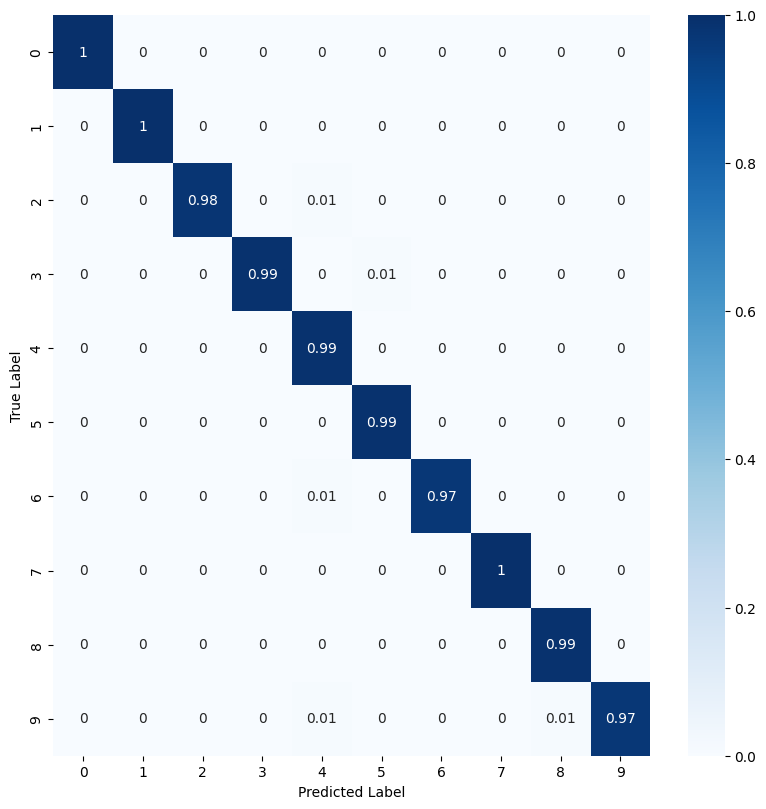

In [43]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float')/con_mat.sum(axis=1)[:,np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [45]:
n_classes = con_mat_norm.shape[0]
metrics = []

# Calcular métricas para cada classe
for i in range(n_classes):
    VP = con_mat_norm[i, i]
    FP = con_mat_norm[:, i].sum() - VP
    FN = con_mat_norm[i, :].sum() - VP
    VN = con_mat_norm.sum() - (VP + FP + FN)

    # Calcular métricas
    precision = VP / (VP + FP) if (VP + FP) != 0 else 0
    recall = VP / (VP + FN) if (VP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    accuracy = (VP + VN) / con_mat_norm.sum()

    metrics.append({
        "Classe": i,
        "Precisão": precision,
        "Sensibilidade": recall,
        "F1-Score": f1_score,
        "Acurácia": accuracy
    })

# Exibir métricas para cada classe
for m in metrics:
    print(f"Classe {m['Classe']}:")
    print(f" - Precisão: {m['Precisão']:.2f}")
    print(f" - Sensibilidade (Recall): {m['Sensibilidade']:.2f}")
    print(f" - F1-Score: {m['F1-Score']:.2f}")
    print(f" - Acurácia: {m['Acurácia']:.2f}\n")

Classe 0:
 - Precisão: 1.00
 - Sensibilidade (Recall): 1.00
 - F1-Score: 1.00
 - Acurácia: 1.00

Classe 1:
 - Precisão: 1.00
 - Sensibilidade (Recall): 1.00
 - F1-Score: 1.00
 - Acurácia: 1.00

Classe 2:
 - Precisão: 1.00
 - Sensibilidade (Recall): 0.99
 - F1-Score: 0.99
 - Acurácia: 1.00

Classe 3:
 - Precisão: 1.00
 - Sensibilidade (Recall): 0.99
 - F1-Score: 0.99
 - Acurácia: 1.00

Classe 4:
 - Precisão: 0.97
 - Sensibilidade (Recall): 1.00
 - F1-Score: 0.99
 - Acurácia: 1.00

Classe 5:
 - Precisão: 0.99
 - Sensibilidade (Recall): 1.00
 - F1-Score: 0.99
 - Acurácia: 1.00

Classe 6:
 - Precisão: 1.00
 - Sensibilidade (Recall): 0.99
 - F1-Score: 0.99
 - Acurácia: 1.00

Classe 7:
 - Precisão: 1.00
 - Sensibilidade (Recall): 1.00
 - F1-Score: 1.00
 - Acurácia: 1.00

Classe 8:
 - Precisão: 0.99
 - Sensibilidade (Recall): 1.00
 - F1-Score: 0.99
 - Acurácia: 1.00

Classe 9:
 - Precisão: 1.00
 - Sensibilidade (Recall): 0.98
 - F1-Score: 0.99
 - Acurácia: 1.00

